# 6.2 Exploring Relationships
This script contains the following:
1. Importing Visualization Libraries and Data
2. Data Cleaning
3. Exploring Relationships
 - Correlations
 - Scatterplots
 - Pair Plots
 - Categorical Plots

## 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.5.2'

In [3]:
# This option ensures the charts created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Import data

df=pd.read_csv(r"C:\Users\miche\DA_Obesity and COVID19\Achievement 06 Notes_Tasks_Data\Obesity Rates and Demographics.csv")

## 2. Cleaning Data

In [5]:
# Explore data
df.head()

Year    State  Obesity Rate % Overall  Obese % Age 18-24  \
0  2011  Alabama                   32.00              16.30   
1  2012  Alabama                   33.00              23.90   
2  2013  Alabama                   32.40              19.00   
3  2014  Alabama                   33.50              20.40   
4  2015  Alabama                   35.63              25.06   

   Obese % Age 25-34  Obese % Age 35-44  Obese % Age 45-54  Obese % Age 55-64  \
0              35.20              35.50              38.00               36.4   
1              31.30              34.30              39.70               40.2   
2              30.40              36.70              40.00               37.1   
3              31.70              40.90              39.90               37.4   
4              35.18              41.05              40.58               40.3   

   Obese % Age 65+  Obese % Education Less than HS  ...  \
0            27.10                           33.60  ...   
1            26.90                           35.20  ...   
2            28.40                           33.80  ...   
3            28.90                           34.80  ...   
4            30.15                           38.44  ...   

   Obese % Income $25-34k  Obese % Income $35-49k  Obese % Income $50k+  \
0                   35.80                   32.30                 30.90   
1                   29.00                   34.50                 31.30   
2                   33.10                   31.10                 30.50   
3                   35.40                   35.50                 31.50   
4                   38.81                   36.48                 33.42   

   Obese % Race White  Obese % Race Black  Obese % Race Hispanic  \
0               29.80               40.10                  28.60   
1               30.10               44.10                  24.10   
2               29.60               41.30                  28.20   
3               31.40               41.90                  22.90   
4               32.33               46.41                  31.41   

   Obese % Female  Obese % Male   Latitude  Longitude  
0           31.80         32.30  32.840571 -86.631861  
1           34.10         31.80  32.840571 -86.631861  
2           34.00         30.90  32.840571 -86.631861  
3           32.90         34.10  32.840571 -86.631861  
4           36.38         34.87  32.840571 -86.631861  

[5 rows x 25 columns]

In [6]:
df.shape

(559, 25)

In [7]:
df.columns

Index(['Year', 'State', 'Obesity Rate % Overall', 'Obese % Age 18-24',
       'Obese % Age 25-34', 'Obese % Age 35-44', 'Obese % Age 45-54',
       'Obese % Age 55-64', 'Obese % Age 65+',
       'Obese % Education Less than HS', 'Obese % Education HS or GED',
       'Obese % Education Some post HS', 'Obese % Education College Grad',
       'Obese % Income Under $15k', 'Obese % Income $15-24k',
       'Obese % Income $25-34k', 'Obese % Income $35-49k',
       'Obese % Income $50k+', 'Obese % Race White', 'Obese % Race Black',
       'Obese % Race Hispanic', 'Obese % Female', 'Obese % Male', 'Latitude',
       'Longitude'],
      dtype='object')

In [8]:
df.dtypes

Year                                int64
State                              object
Obesity Rate % Overall            float64
Obese % Age 18-24                 float64
Obese % Age 25-34                 float64
Obese % Age 35-44                 float64
Obese % Age 45-54                 float64
Obese % Age 55-64                 float64
Obese % Age 65+                   float64
Obese % Education Less than HS    float64
Obese % Education HS or GED       float64
Obese % Education Some post HS    float64
Obese % Education College Grad    float64
Obese % Income Under $15k         float64
Obese % Income $15-24k            float64
Obese % Income $25-34k            float64
Obese % Income $35-49k            float64
Obese % Income $50k+              float64
Obese % Race White                float64
Obese % Race Black                float64
Obese % Race Hispanic             float64
Obese % Female                    float64
Obese % Male                      float64
Latitude                          

In [9]:
# Check for missing values

df.isnull().sum()

Year                                0
State                               0
Obesity Rate % Overall              0
Obese % Age 18-24                   6
Obese % Age 25-34                   0
Obese % Age 35-44                   0
Obese % Age 45-54                   0
Obese % Age 55-64                   0
Obese % Age 65+                     0
Obese % Education Less than HS      0
Obese % Education HS or GED         0
Obese % Education Some post HS      0
Obese % Education College Grad      0
Obese % Income Under $15k           0
Obese % Income $15-24k              0
Obese % Income $25-34k              0
Obese % Income $35-49k              0
Obese % Income $50k+                0
Obese % Race White                  0
Obese % Race Black                103
Obese % Race Hispanic              28
Obese % Female                      0
Obese % Male                        0
Latitude                            0
Longitude                           0
dtype: int64

#### Handling Missing Data: In this case, we will do nothing with the missing data. Supplementary data sources are limited in providing trustworthy data. The missing values account for over 15% of the column entries, so it will not be removed. Because the missing data accounts for obesity rates accoss various locations, replacing the missing with the median or mean should not apply.

In [10]:
# Find duplicates

df_dups = df[df.duplicated()]
df_dups.shape

# No duplicates

(0, 25)

In [11]:
# Check for mixed-type data
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns 

## 3. Exploring Relationships

### Correlations:

In [12]:
# Create a correlation matrix using pandas

df.corr()

Year  Obesity Rate % Overall  \
Year                            1.000000                0.428992   
Obesity Rate % Overall          0.428992                1.000000   
Obese % Age 18-24               0.387579                0.781096   
Obese % Age 25-34               0.401218                0.886109   
Obese % Age 35-44               0.351086                0.907867   
Obese % Age 45-54               0.460621                0.924091   
Obese % Age 55-64               0.334059                0.902336   
Obese % Age 65+                 0.402734                0.810253   
Obese % Education Less than HS  0.344091                0.574602   
Obese % Education HS or GED     0.463022                0.868757   
Obese % Education Some post HS  0.486476                0.926618   
Obese % Education College Grad  0.405150                0.936611   
Obese % Income Under $15k       0.390669                0.711355   
Obese % Income $15-24k          0.434949                0.833051   
Obese % Income $25-34k          0.459370                0.800835   
Obese % Income $35-49k          0.448676                0.864274   
Obese % Income $50k+            0.500245                0.942324   
Obese % Race White              0.365419                0.901370   
Obese % Race Black              0.235669                0.701804   
Obese % Race Hispanic           0.386704                0.474580   
Obese % Female                  0.426086                0.959300   
Obese % Male                    0.385409                0.941255   
Latitude                        0.004790               -0.135679   
Longitude                      -0.003457                0.181358   

                                Obese % Age 18-24  Obese % Age 25-34  \
Year                                     0.387579           0.401218   
Obesity Rate % Overall                   0.781096           0.886109   
Obese % Age 18-24                        1.000000           0.683251   
Obese % Age 25-34                        0.683251           1.000000   
Obese % Age 35-44                        0.685667           0.785663   
Obese % Age 45-54                        0.704862           0.803657   
Obese % Age 55-64                        0.636170           0.730181   
Obese % Age 65+                          0.503050           0.590762   
Obese % Education Less than HS           0.486469           0.494583   
Obese % Education HS or GED              0.734689           0.742605   
Obese % Education Some post HS           0.721756           0.794935   
Obese % Education College Grad           0.709008           0.834719   
Obese % Income Under $15k                0.592600           0.616175   
Obese % Income $15-24k                   0.669533           0.698882   
Obese % Income $25-34k                   0.615354           0.693621   
Obese % Income $35-49k                   0.658576           0.741981   
Obese % Income $50k+                     0.720886           0.851544   
Obese % Race White                       0.654503           0.791889   
Obese % Race Black                       0.556324           0.599431   
Obese % Race Hispanic                    0.379349           0.484614   
Obese % Female                           0.772721           0.833712   
Obese % Male                             0.711620           0.854728   
Latitude                                -0.217816          -0.209199   
Longitude                                0.052664           0.049909   

                                Obese % Age 35-44  Obese % Age 45-54  \
Year                                     0.351086           0.460621   
Obesity Rate % Overall                   0.907867           0.924091   
Obese % Age 18-24                        0.685667           0.704862   
Obese % Age 25-34                        0.785663           0.803657   
Obese % Age 35-44                        1.000000           0.800543   
Obese % Age 45-54                        0.800543           1.000000   
Obese % Age 55-64             

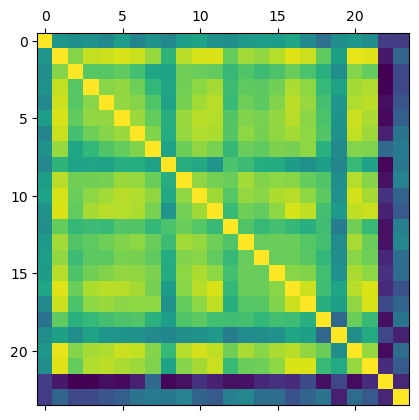

In [13]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

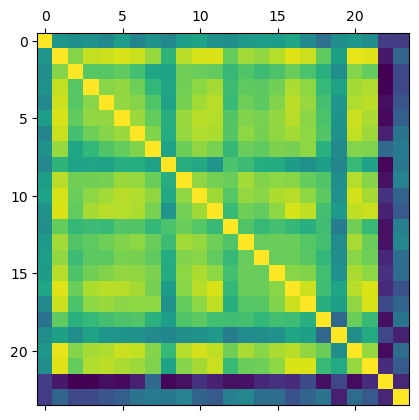

In [17]:
# Save figure
plt.matshow(df.corr())
plt.savefig("obesity_correlation heatmap.png") 

Text(0.5, 1.0, 'Correlation Matrix')

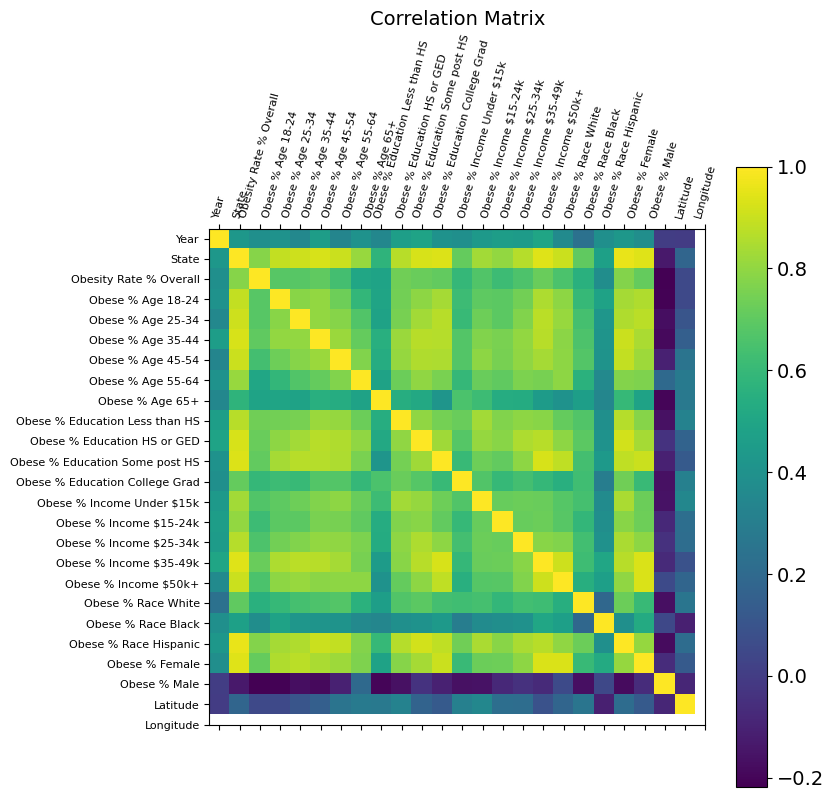

In [16]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=75) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### Create a correlation heatmap using seaborn:

In [18]:
df.columns

Index(['Year', 'State', 'Obesity Rate % Overall', 'Obese % Age 18-24',
       'Obese % Age 25-34', 'Obese % Age 35-44', 'Obese % Age 45-54',
       'Obese % Age 55-64', 'Obese % Age 65+',
       'Obese % Education Less than HS', 'Obese % Education HS or GED',
       'Obese % Education Some post HS', 'Obese % Education College Grad',
       'Obese % Income Under $15k', 'Obese % Income $15-24k',
       'Obese % Income $25-34k', 'Obese % Income $35-49k',
       'Obese % Income $50k+', 'Obese % Race White', 'Obese % Race Black',
       'Obese % Race Hispanic', 'Obese % Female', 'Obese % Male', 'Latitude',
       'Longitude'],
      dtype='object')

In [19]:
# Create a subset excluding year and state
sub=df[['Obesity Rate % Overall', 'Obese % Age 18-24',
       'Obese % Age 25-34', 'Obese % Age 35-44', 'Obese % Age 45-54',
       'Obese % Age 55-64', 'Obese % Age 65+',
       'Obese % Education Less than HS', 'Obese % Education HS or GED',
       'Obese % Education Some post HS', 'Obese % Education College Grad',
       'Obese % Income Under $15k', 'Obese % Income $15-24k',
       'Obese % Income $25-34k', 'Obese % Income $35-49k',
       'Obese % Income $50k+', 'Obese % Race White', 'Obese % Race Black',
       'Obese % Race Hispanic', 'Obese % Female', 'Obese % Male', 'Latitude',
       'Longitude']]

In [20]:
sub

Obesity Rate % Overall  Obese % Age 18-24  Obese % Age 25-34  \
0                     32.00              16.30              35.20   
1                     33.00              23.90              31.30   
2                     32.40              19.00              30.40   
3                     33.50              20.40              31.70   
4                     35.63              25.06              35.18   
..                      ...                ...                ...   
554                   28.82              12.97              24.19   
555                   29.03              12.00              22.25   
556                   29.66              20.63              25.60   
557                   30.67              19.56              28.55   
558                   32.00              28.79              31.88   

     Obese % Age 35-44  Obese % Age 45-54  Obese % Age 55-64  Obese % Age 65+  \
0                35.50              38.00              36.40            27.10   
1                34.30              39.70              40.20            26.90   
2                36.70              40.00              37.10            28.40   
3                40.90              39.90              37.40            28.90   
4                41.05              40.58              40.30            30.15   
..                 ...                ...                ...              ...   
554              33.30              37.69              33.40            28.63   
555              37.40              39.86              33.99            26.41   
556              32.26              37.19              32.52            28.72   
557              32.69              39.92              32.19            29.55   
558              33.58              34.79              34.21            29.58   

     Obese % Education Less than HS  Obese % Education HS or GED  \
0                             33.60                        32.80   
1                             35.20                        33.50   
2                             33.80                        32.10   
3                             34.80                        35.40   
4                             38.44                        37.64   
..                              ...                          ...   
554                           19.07                        31.33   
555                           30.18                        26.24   
556                           34.44                        29.33   
557                           36.65                        30.90   
558                           32.67                        35.01   

     Obese % Education Some post HS  ...  Obese % Income $25-34k  \
0                             33.80  ...                   35.80   
1                             34.40  ...                   29.00   
2                             35.20  ...                   33.10   
3                             34.40  ...                   35.40   
4                             36.49  ...                   38.81   
..                              ...  ...                     ...   
554                           32.10  ...                   29.05   
555                           33.89  ...                   27.40   
556                           33.39  ...                   32.62   
557                           33.48  ...                   31.64   
558                           32.79  ...                   31.93   

     Obese % Income $35-49k  Obese % Income $50k+  Obese % Race White  \
0                     32.30                 30.90               29.80   
1                     34.50                 31.30               30.10   
2                     31.10                 30.50               29.60   
3                     35.50                 31.50               31.40   
4                     36.48                 33.42               32.33   
..                      ...                   ...                 ...   
554                   31.09                 27.92         

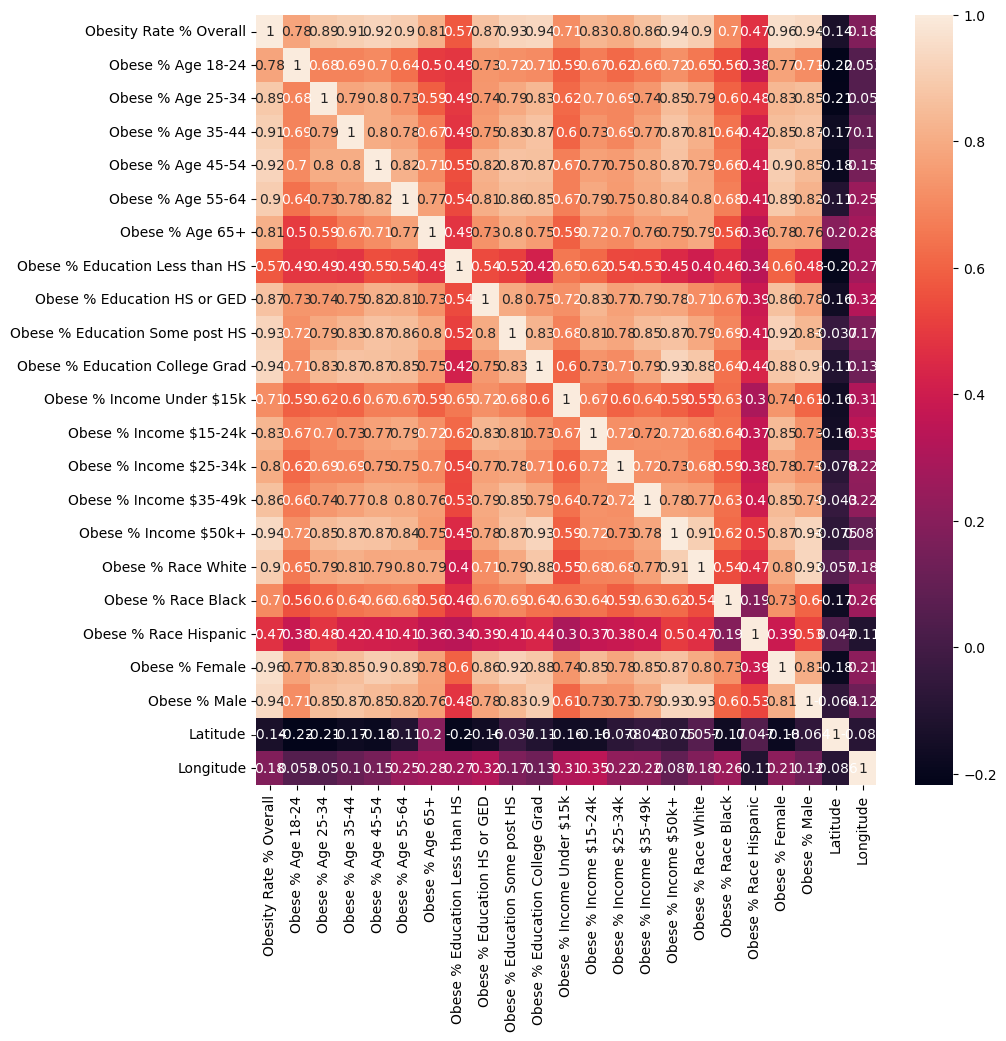

In [21]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

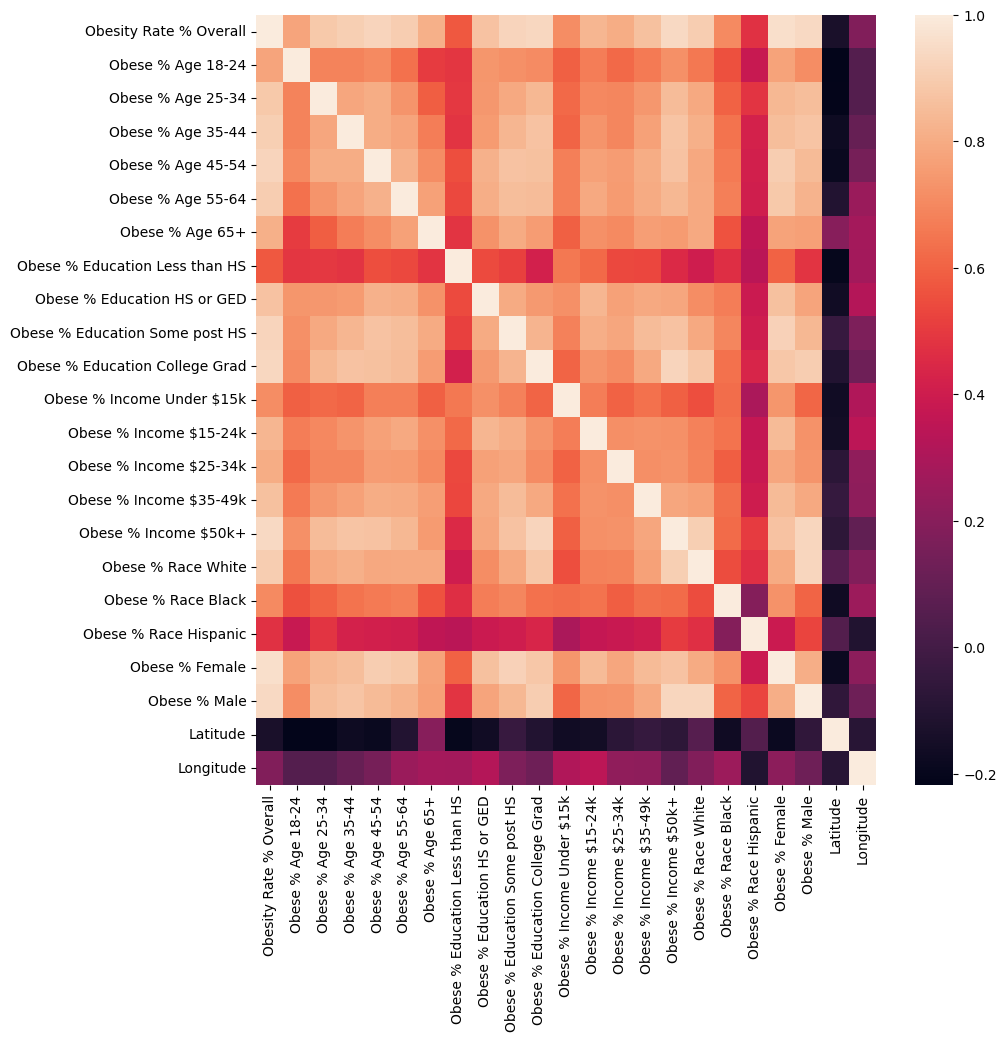

In [23]:
# Create a subplot with matplotlib, without correlation coefficient
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub.corr(), ax = ax)

### Scatterplots:

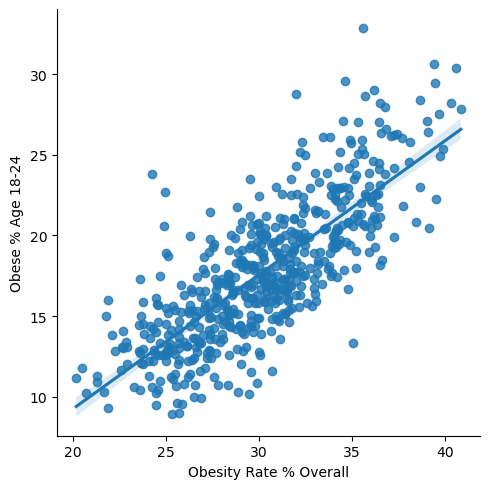

In [25]:
# Create a scatterplot for the "Overall Obesity" and "Obese % Age" columns in seaborn

sns.lmplot(x = 'Obesity Rate % Overall', y = 'Obese % Age 18-24', data = df)

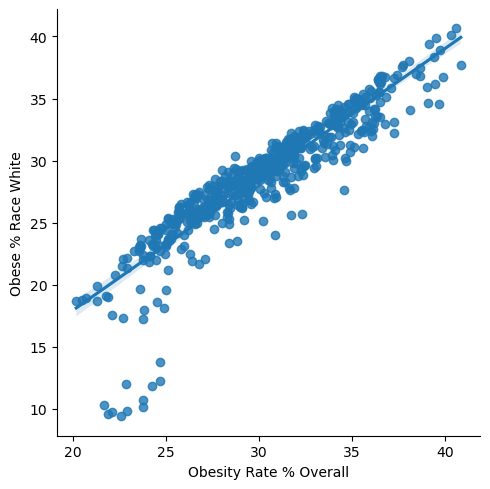

In [26]:
# Create a scatterplot for the "Overall Obesity" and "Obese % Race" columns in seaborn

sns.lmplot(x = 'Obesity Rate % Overall', y = 'Obese % Race White', data = df)

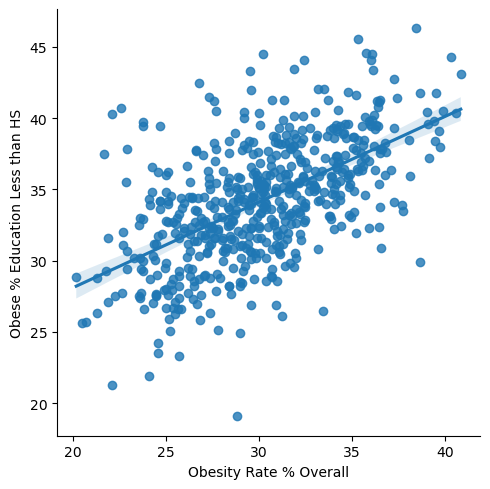

In [27]:
# Create a scatterplot for the "Overall Obesity" and "Obese % Education" columns in seaborn

sns.lmplot(x = 'Obesity Rate % Overall', y = 'Obese % Education Less than HS', data = df)

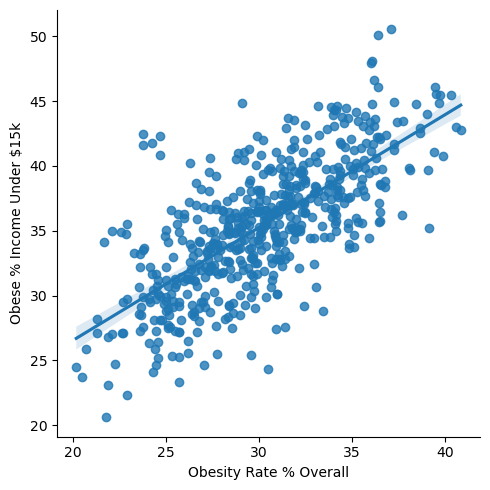

In [28]:
# Create a scatterplot for the "Overall Obesity" and "Obese % Income" columns in seaborn

sns.lmplot(x = 'Obesity Rate % Overall', y = 'Obese % Income Under $15k', data = df)

### Pair Plots:

In [32]:
# Keep only the variables you want to use in the pair plot for Age

sub_2 = sub[['Obesity Rate % Overall', 'Obese % Age 18-24',
       'Obese % Age 25-34', 'Obese % Age 35-44', 'Obese % Age 45-54',
       'Obese % Age 55-64', 'Obese % Age 65+']]

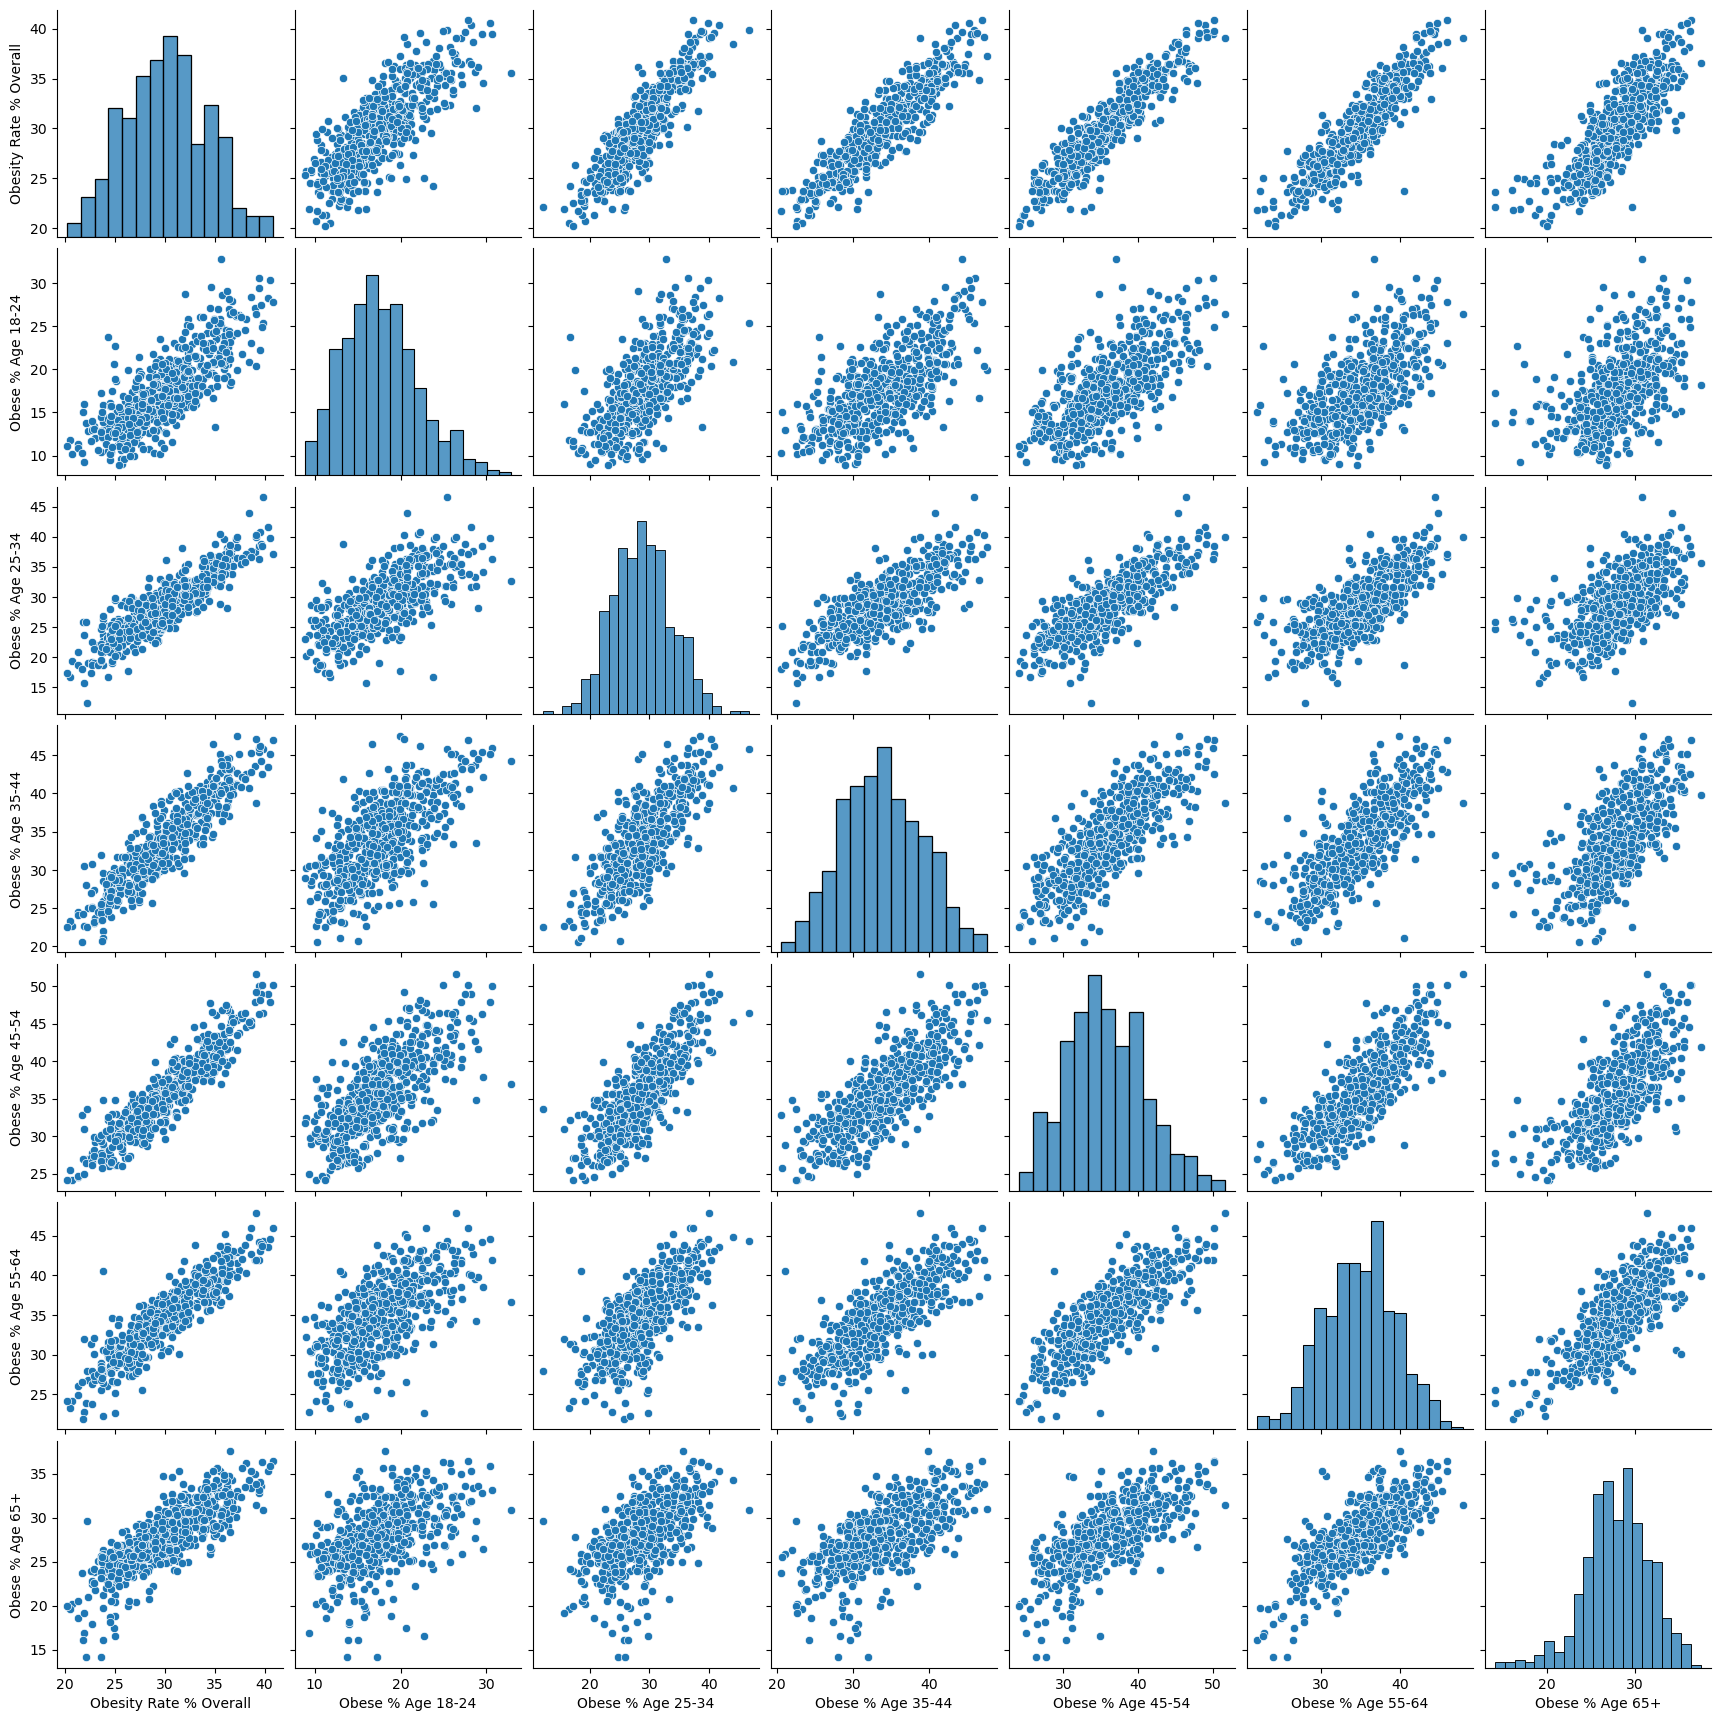

In [30]:
g = sns.pairplot(sub_2)

In [33]:
# Keep only the variables you want to use in the pair plot for Education

sub_3 = sub[['Obesity Rate % Overall', 'Obese % Education Less than HS', 'Obese % Education HS or GED',
       'Obese % Education Some post HS', 'Obese % Education College Grad']]

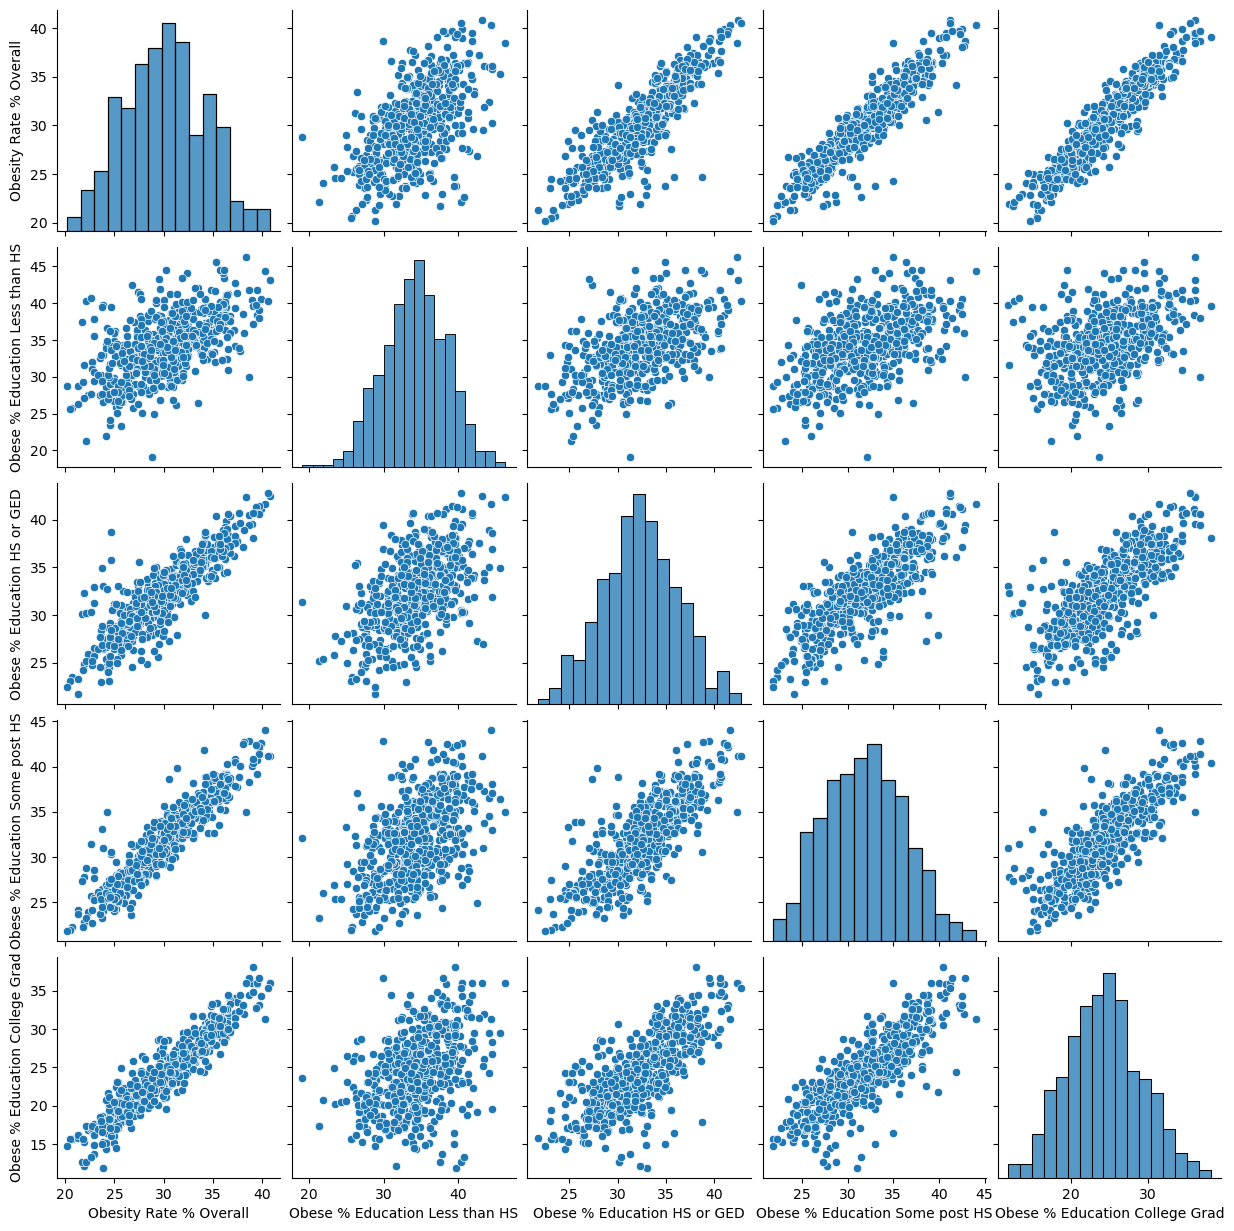

In [34]:
g = sns.pairplot(sub_3)

In [35]:
# Keep only the variables you want to use in the pair plot for Income

sub_4 = sub[['Obesity Rate % Overall', 'Obese % Income Under $15k', 'Obese % Income $15-24k',
       'Obese % Income $25-34k', 'Obese % Income $35-49k',
       'Obese % Income $50k+']]

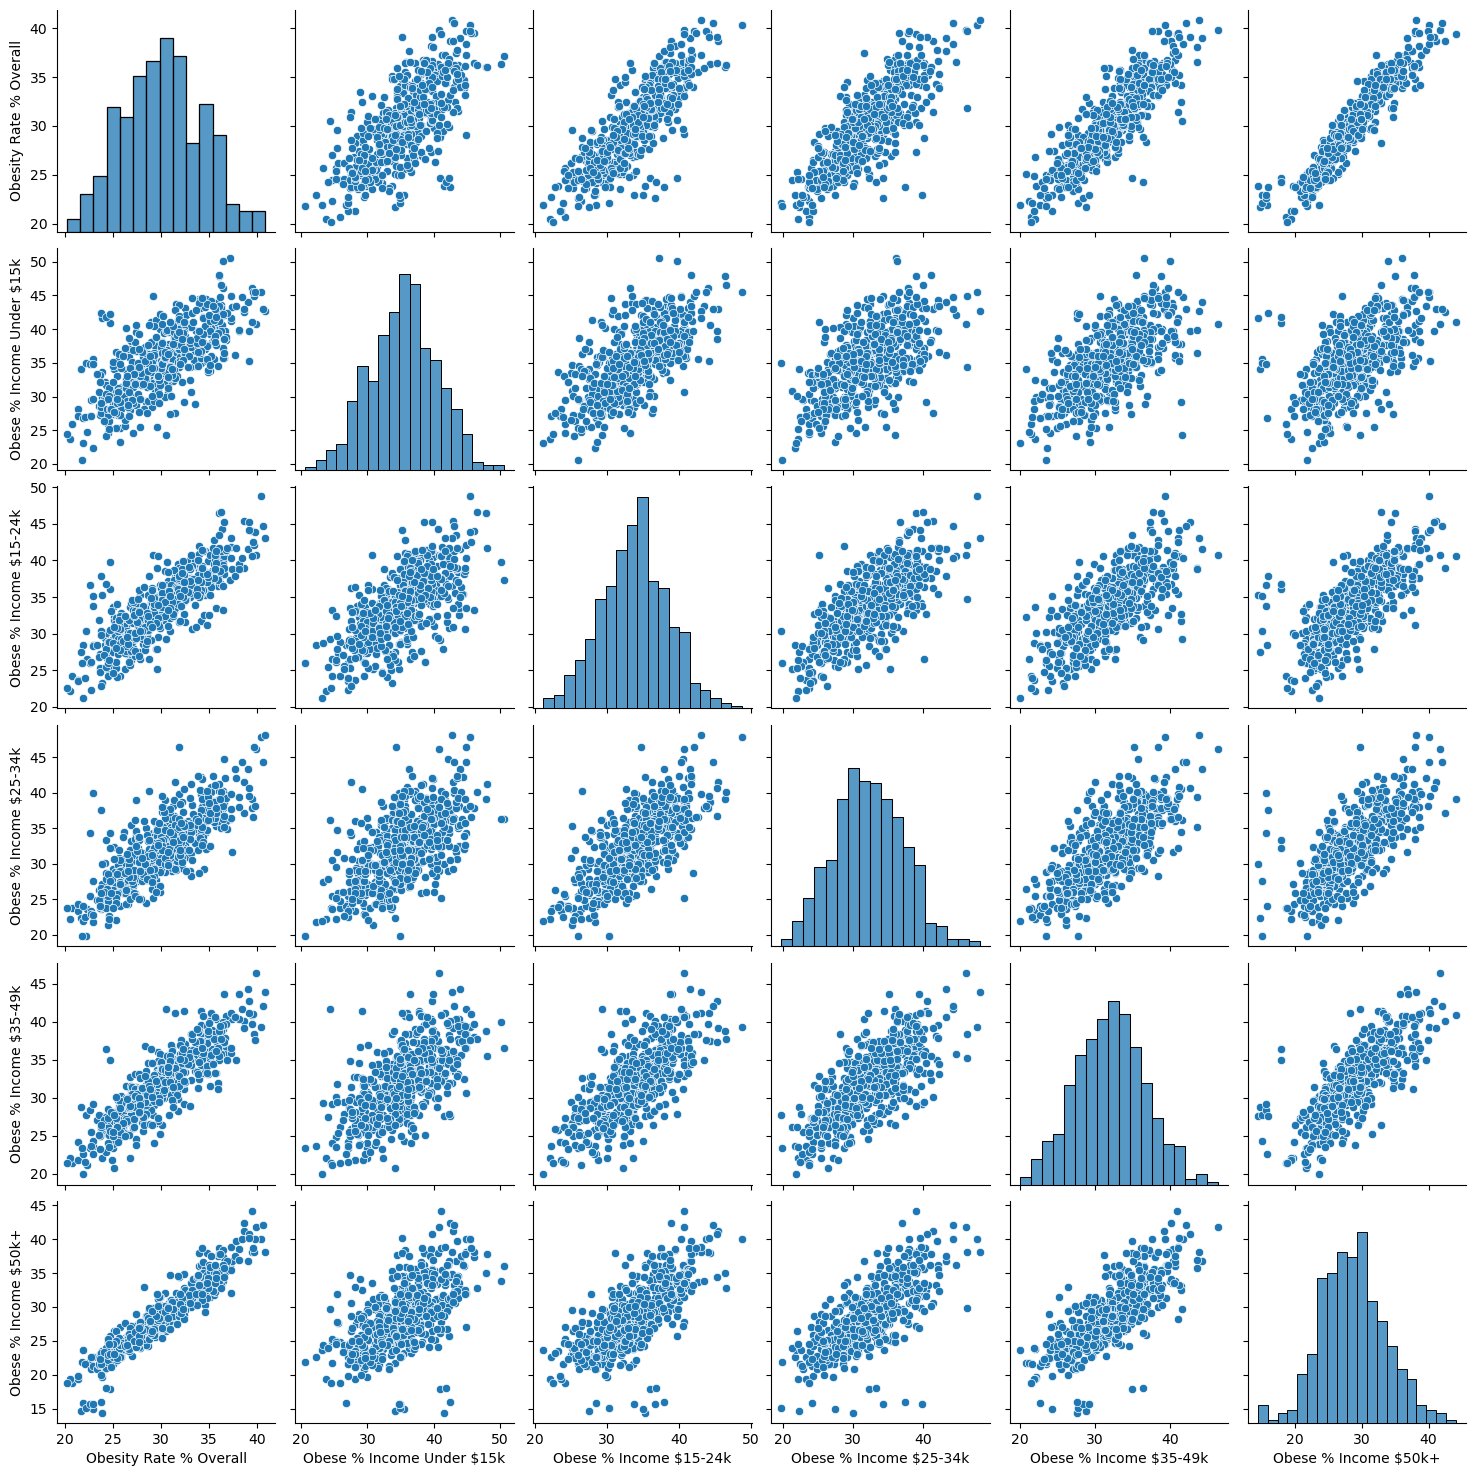

In [36]:
# Create a pair plot 

g = sns.pairplot(sub_4)

In [37]:
# Keep only the variables you want to use in the pair plot for Race

sub_5 = sub[['Obesity Rate % Overall', 'Obese % Race White', 'Obese % Race Black',
       'Obese % Race Hispanic']]

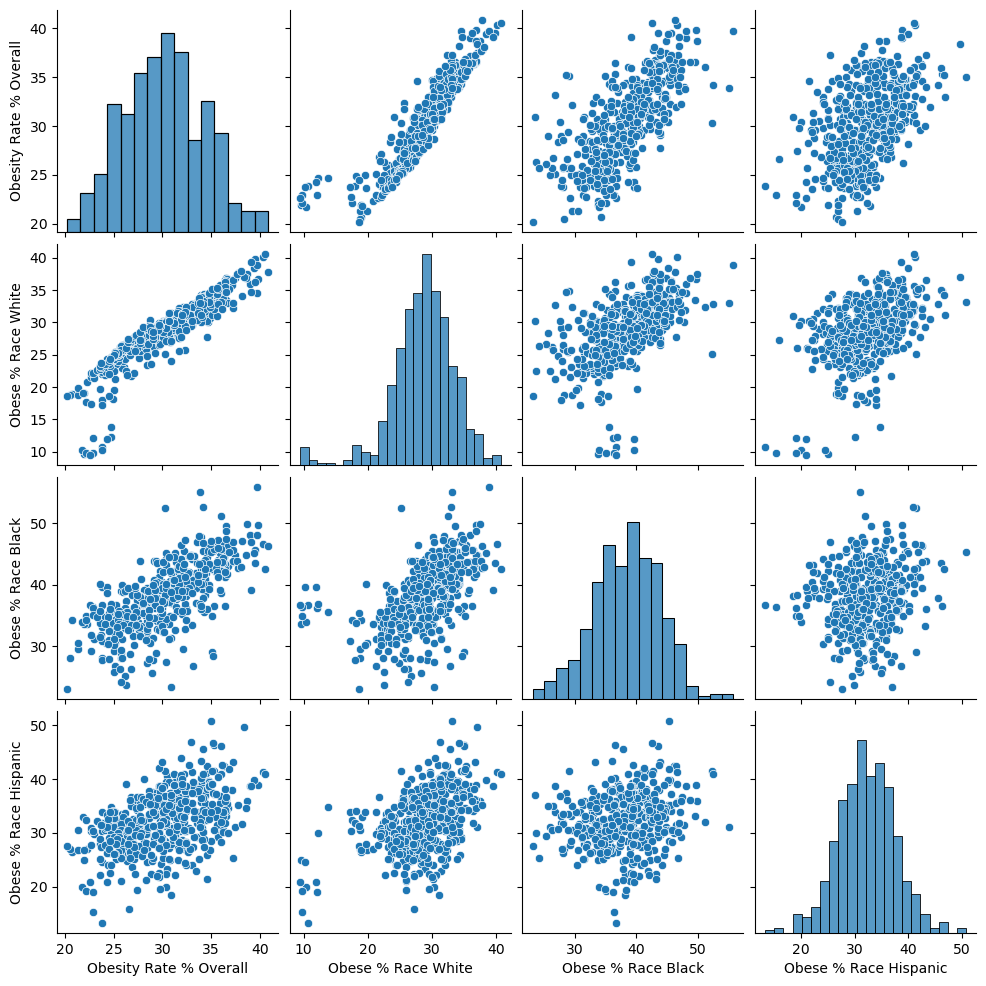

In [38]:
# Create a pair plot 

g = sns.pairplot(sub_5)

In [39]:
# Keep only the variables you want to use in the pair plot for Gender

sub_6 = sub[['Obesity Rate % Overall', 'Obese % Female', 'Obese % Male']]

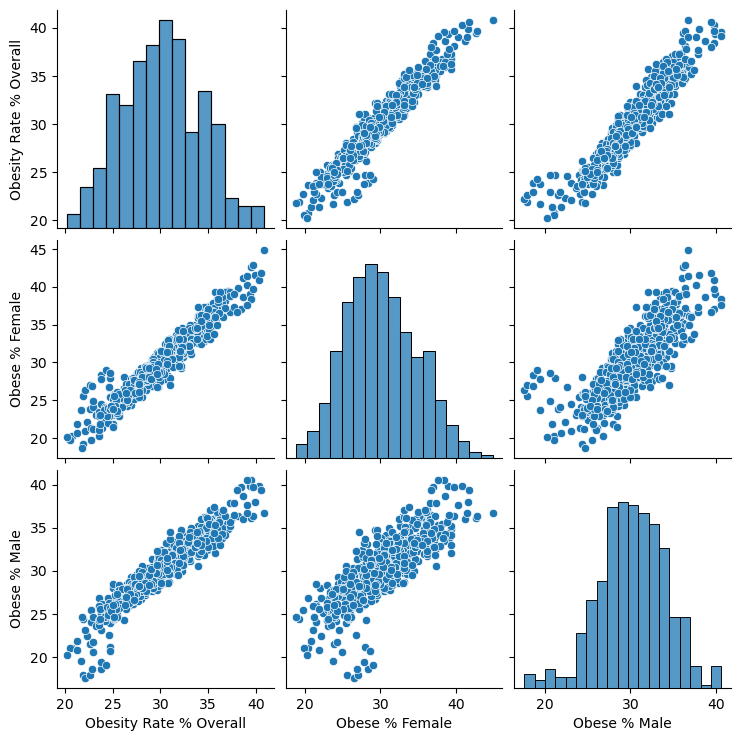

In [40]:
# Create a pair plot 

g = sns.pairplot(sub_6)

### Categorical Plots:

<AxesSubplot:xlabel='Obesity Rate % Overall', ylabel='Count'>

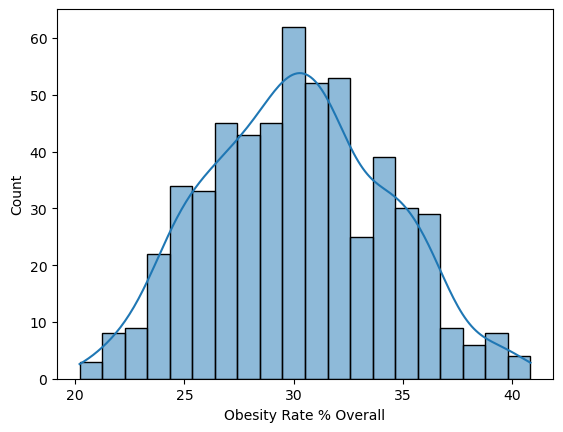

In [41]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the obesity rates. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['Obesity Rate % Overall'], bins = 20, kde = True)

In [45]:
df.loc[df['Obesity Rate % Overall'] < 27, 'Rate Category'] = 'Lower Rate of Obesity'

In [46]:
df.loc[(df['Obesity Rate % Overall'] >= 27) & (df['Obesity Rate % Overall'] < 33), 'Rate Category'] = 'Avg Rate of Obesity'

In [47]:
df.loc[df['Obesity Rate % Overall'] >= 34, 'Rate Category'] = 'Higher Rate of Obesity'

In [48]:
df['Rate Category'].value_counts(dropna = False)

Avg Rate of Obesity       285
Lower Rate of Obesity     132
Higher Rate of Obesity    113
NaN                        29
Name: Rate Category, dtype: int64

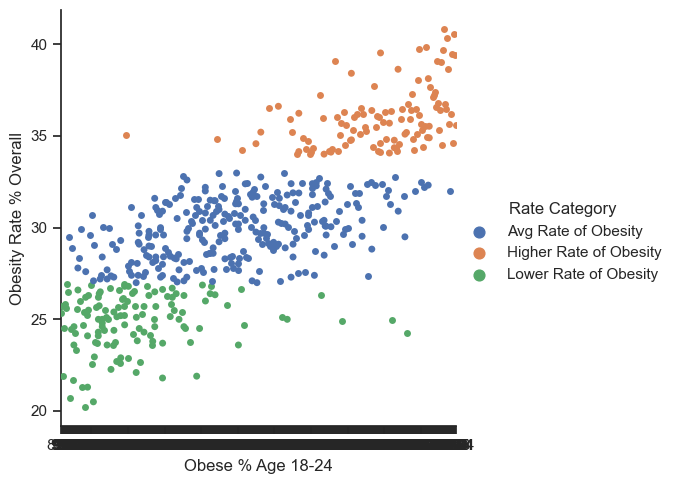

In [50]:
# Create a categorical plot in seaborn using the rate categories created above

sns.set(style="ticks")
a = sns.catplot(x="Obese % Age 18-24", y="Obesity Rate % Overall", hue="Rate Category", data=df)

In [51]:
# fig = g.get_figure()
a.savefig("categorical_obeseXage.png") 

# The image will be saved in the working directory. 

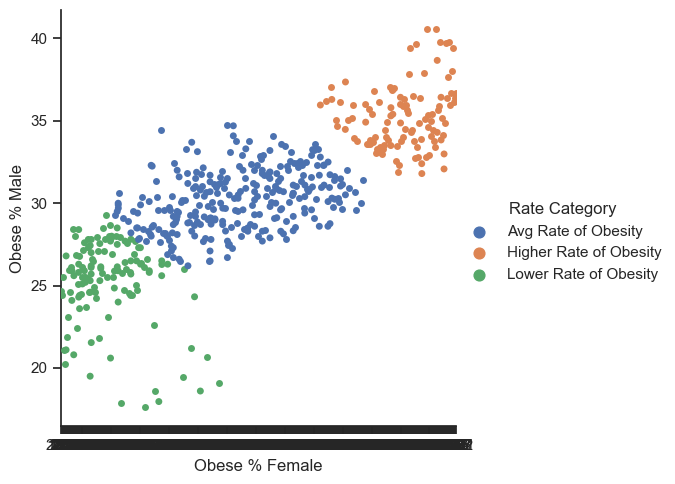

In [52]:
# Create a categorical plot in seaborn using the rate categories created above

sns.set(style="ticks")
b = sns.catplot(x="Obese % Female", y="Obese % Male", hue="Rate Category", data=df)

In [53]:
# fig = g.get_figure()
b.savefig("categorical_obeseXgender.png")